#VRP PROBLEM

<img src="http://neo.lcc.uma.es/dynamic/images/vrp.png" width="400" />

- $n$ is the number of clientes
- $N$ is set of clients, with $N=\{1,2,...,n\}$
- $V$ is set of nodes, with $V=\{0\}\cup N$
- $A$ is set of arcs, with $A=\{(i,j)\in V^2 : i\neq j\}$
- $c_{ij}$ is cost of travel over arc $(i,j)\in A$
- $Q$ is the vehicle capacity
- $q_i$ is the amount that has to be delivered to customer $i\in N$

The formulation is the following :
$$\begin{align}
\min \quad & \sum_{i,j\in A} c_{ij} x_{ij} \\
\text{s.t.} \quad & \sum_{j\in V , j\neq i} x_{ij} = 1 && i \in N \\
& \sum_{i\in V , i\neq j} x_{ij} = 1 && j \in N \\
& \text{if} \ x_{ij} = 1 \ \Rightarrow \ u_i + q_j = u_j && i,j \in A : j\neq 0, i\neq 0 \\
& q_i \leq u_i \leq Q && i \in N \\
& x_{ij} \in \{0,1\} && i,j \in A
\end{align}$$

In [1]:
nb_client = int(input('Entrez le nombre de clients: '))
nb_capacity = int(input('Saisir la capacité d\'un véhicule: '))

Entrez le nombre de clients: 5
Saisir la capacité d'un véhicule: 10


In [ ]:
# on importe le paquet numpy en tant que np
import numpy as np

In [75]:
# rnd est un objet qui génère des nombres aléatoires
rnd = np.random
# seed (0) est une méthode qui réinitialise à chaque fois le même ensemble aléatoire de nombres (rnd)
rnd.seed(0)

In [76]:
# nombre de clients
n = nb_client
# Capacité maximale du véhicule
Q = nb_capacity
# tous les noeuds = les clients sans le dépôt
N = [i for i in range(1,n+1)]
# tous les noeuds avec le dépôt
V = [0] + N
# collection qui contient ce que chaque client (noeud) demande
q = {i:rnd.randint(1,10) for i in N}

In [77]:
# génération de nombres aléatoires entre (0 et 15) * 200
loc_x = rnd.rand(len(V))*200
# génération de nombres aléatoires entre (0 et 15) * 100
loc_y = rnd.rand(len(V))*100

In [78]:
# on importe le package matplot.pyplot en tant que plt
import matplotlib.pyplot as plt

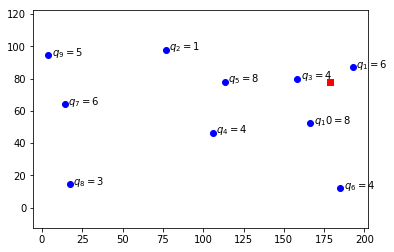

In [79]:
# on trace les n noeuds (clients) sans le noeuds 0 (dépôt) et on choisie que chaque noeud soit bleu 
plt.scatter(loc_x[1:],loc_y[1:],c='b')
# on associe et on écrit la demande de chaque client à droite du noeud
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2, loc_y[i]))
# le noeud 0 (dépôt) est représenté par un carré rouge
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');

In [80]:
# Initialisation de l'ensemble des arcs A
A = [(i,j) for i in V for j in V if i!=j]
c = {(i, j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i,j in A}

In [2]:
# on importe le docplex.mp.model à partir du CPLEX en tant que Model
from docplex.mp.model import Model

In [82]:
mdl = Model('CVRP')

In [83]:
# Initialisation de la variable binaire x_i, j
x = mdl.binary_var_dict(A,name='x')
#Initialisation de la demande cumulative u
u = mdl.continuous_var_dict(N,ub=Q,name='u')

In [84]:
# Initialisation de la fonction objectif
mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))
# Initialisation de la première contrainte
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
# Initialisation de la deuxième contrainte
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)
# Initialisation de la troisième contrainte
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j]) for i,j in A if i!=0 and j!=0)
#Initialisation de la quatrième contrainte
mdl.add_constraints(u[i]>=q[i] for i in N)
# limiteur de temps au cas où la méthode dure trop longtemps
mdl.parameters.timelimit = 15
# on obtient la solution
solution = mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201804051
CPXPARAM_TimeLimit                               15
Found incumbent of value 1784.255531 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.02 sec. (0.35 ticks)
Probing time = 0.00 sec. (0.33 ticks)
Tried aggregator 1 time.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.00 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.31 ticks)
Clique table members: 65.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.

In [85]:
# Impression de la solution
print(solution)

solution for: CVRP
objective: 726.249
x_0_4=1
x_0_5=1
x_0_10=1
x_1_0=1
x_2_0=1
x_3_0=1
x_4_8=1
x_5_3=1
x_6_1=1
x_7_9=1
x_8_7=1
x_9_2=1
x_10_6=1
u_1=18.000
u_2=19.000
u_3=20.000
u_4=4.000
u_5=16.000
u_6=12.000
u_7=13.000
u_8=7.000
u_9=18.000
u_10=8.000



In [86]:
# Indicateur de solution optimal ou non (2 = optimal, 1 = non-optimal)
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [87]:
# on identifie les arrêtes actives
active_arcs = [a for a in A if x[a].solution_value>0.9]

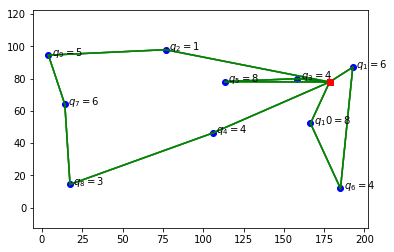

In [88]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2, loc_y[i]))
    for i,j in active_arcs:
        # on met en couleur les arrêtes actives
        plt.plot([loc_x[i], loc_x[j]],[loc_y[i],loc_y[j]],c='g',alpha=0.3)
    plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
    plt.axis('equal');